## Dependencias

In [5]:
!pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import numpy as np
import gudhi as gd  
from sklearn import manifold
from pylab import *
from sklearn.decomposition import PCA
from gtda.plotting import plot_point_cloud
from gtda.time_series import SingleTakensEmbedding

%matplotlib inline
# import sklearn_tda


### Importar datos

In [8]:
object=pd.read_pickle('uke_eggedal_data_challenge.pkl')
df=pd.DataFrame.from_dict(object,orient='index')

In [9]:
df=df.T
df

,flow,obs_tas,flow_dates,obs_lon_lat,obs_pr,obs_dates
0,1.723781,"[-10.600000381469727, -9.699999809265137, -6.6...",1958-01-04,9.37,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000...",1957-01-01
1,0.960882,"[-20.5, -19.100000381469727, -12.0, -17.700000...",1958-01-05,60.23,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000...",1957-01-02
2,0.001,"[-23.600000381469727, -22.5, -15.1000003814697...",1958-01-06,None,"[0.10000000149011612, 0.0, 0.30000001192092896...",1957-01-03
3,0.001,"[-16.200000762939453, -16.0, -14.1000003814697...",1958-01-07,None,"[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976...",1957-01-04
4,0.316796,"[-7.900000095367432, -7.800000190734863, -9.5,...",1958-01-08,None,"[9.300000190734863, 8.600000381469727, 8.0, 8....",1957-01-05
...,...,...,...,...,...,...
21541,1.812796,"[-12.5, -11.699999809265137, -8.60000038146972...",2016-12-26,None,"[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27
21542,None,"[-12.5, -11.899999618530273, -9.10000038146972...",NaT,None,"[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28
21543,None,"[-11.899999618530273, -11.399999618530273, -8....",NaT,None,"[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29
21544,None,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...",NaT,None,"[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30


### Hay un desface en la data, se separan en df_target y df predic, se usa merge con date como llave

In [10]:
df_target=df[['flow_dates','flow']]
df_target.sort_values(by='flow_dates')
df_target=df_target.dropna()
df_target

,flow_dates,flow
0,1958-01-04,1.723781
1,1958-01-05,0.960882
2,1958-01-06,0.001
3,1958-01-07,0.001
4,1958-01-08,0.316796
...,...,...
21537,2016-12-22,4.84329
21538,2016-12-23,3.75697
21539,2016-12-24,3.556818
21540,2016-12-25,3.402133


In [11]:
df_predic=df[['obs_dates','obs_tas','obs_pr']]
df_predic.sort_values(by='obs_dates')
df_predic=df_predic.dropna()
df_predic


,obs_dates,obs_tas,obs_pr
0,1957-01-01,"[-10.600000381469727, -9.699999809265137, -6.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000..."
1,1957-01-02,"[-20.5, -19.100000381469727, -12.0, -17.700000...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000..."
2,1957-01-03,"[-23.600000381469727, -22.5, -15.1000003814697...","[0.10000000149011612, 0.0, 0.30000001192092896..."
3,1957-01-04,"[-16.200000762939453, -16.0, -14.1000003814697...","[1.0, 0.0, 1.0, 1.100000023841858, 0.899999976..."
4,1957-01-05,"[-7.900000095367432, -7.800000190734863, -9.5,...","[9.300000190734863, 8.600000381469727, 8.0, 8...."
...,...,...,...
21541,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100..."
21542,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6...."
21543,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099..."
21544,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5...."


### Se hace el merge tomando como llaves las fechas, el resultado es un df con fechas que ya hacen match

In [12]:
df_final=df_predic.merge(df_target,how='inner',left_on='obs_dates',right_on='flow_dates')
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796
...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777


### Climate AI sugiere usar o PCA o simplemente promediar los datos vectorizados en lugar de tratarlos como variables distintas

In [13]:
df_final['temperatures'] = df_final['obs_tas'].apply(lambda x: np.mean(x))
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow,temperatures
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781,-12.655556
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882,-7.722222
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001,-8.088889
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001,-10.122222
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796,-17.455555
...,...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704,-9.944444
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625,-10.288889
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884,-9.411111
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777,-5.055556


In [14]:
df_final['precipitations'] = df_final['obs_pr'].apply(lambda x: np.mean(x))
df_final

,obs_dates,obs_tas,obs_pr,flow_dates,flow,temperatures,precipitations
0,1958-01-04,"[-12.800000190734863, -13.0, -13.0, -12.5, -12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",1958-01-04,1.723781,-12.655556,0.000000
1,1958-01-05,"[-7.800000190734863, -7.900000095367432, -8.39...","[2.0, 2.200000047683716, 3.0, 3.29999995231628...",1958-01-05,0.960882,-7.722222,2.588889
2,1958-01-06,"[-11.0, -9.899999618530273, -6.5, -8.5, -9.0, ...","[12.699999809265137, 11.0, 16.5, 12.5, 11.1999...",1958-01-06,0.001,-8.088889,12.766667
3,1958-01-07,"[-13.199999809265137, -12.199999809265137, -7....","[6.599999904632568, 6.900000095367432, 9.60000...",1958-01-07,0.001,-10.122222,6.877778
4,1958-01-08,"[-19.899999618530273, -19.299999237060547, -15...","[3.4000000953674316, 3.5999999046325684, 2.700...",1958-01-08,0.316796,-17.455555,3.411111
...,...,...,...,...,...,...,...
21173,2015-12-27,"[-12.5, -11.699999809265137, -8.60000038146972...","[2.200000047683716, 0.10000000149011612, 1.100...",2015-12-27,2.17704,-9.944444,0.555556
21174,2015-12-28,"[-12.5, -11.899999618530273, -9.10000038146972...","[5.5, 4.900000095367432, 8.300000190734863, 6....",2015-12-28,4.87625,-10.288889,4.888889
21175,2015-12-29,"[-11.899999618530273, -11.399999618530273, -8....","[1.7999999523162842, 1.7000000476837158, 2.099...",2015-12-29,4.99884,-9.411111,1.277778
21176,2015-12-30,"[-7.0, -6.5, -3.4000000953674316, -5.900000095...","[4.099999904632568, 3.5, 4.599999904632568, 5....",2015-12-30,4.428777,-5.055556,3.444444


## Inicia el TDA

In [15]:
max_embedding_dimension = 10
max_time_delay = 20
stride = 30

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    stride=stride,
)

In [16]:
def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

#### Incrustacion y plot de componentes principales de precipitaciones

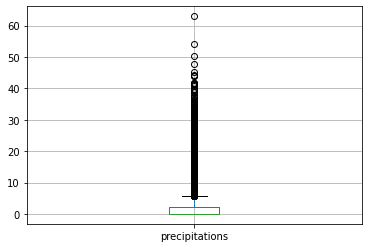

In [17]:
df_final.boxplot('precipitations')

In [18]:
y_periodic_embedded = fit_embedder(embedder_periodic, df_final['precipitations'])

Shape of embedded time series: (702, 8)
Optimal embedding dimension is 8 and time delay is 18


In [19]:
pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

#### Incrustacion y plot de componentes principales de temperaturas

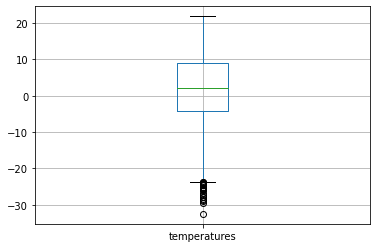

In [20]:
df_final.boxplot('temperatures')

In [21]:
y_periodic_embedded = fit_embedder(embedder_periodic, df_final['temperatures'])
pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

Shape of embedded time series: (703, 6)
Optimal embedding dimension is 6 and time delay is 20


In [22]:
y_periodic_embedded = fit_embedder(embedder_periodic, df_final['temperatures'])


pca = PCA(n_components=2)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

Shape of embedded time series: (703, 6)
Optimal embedding dimension is 6 and time delay is 20


In [23]:
from scipy import stats
owo=df_final[(np.abs(stats.zscore(df_final['temperatures'])) < 3)]

### Diagrama de persistencia

In [24]:
y_periodic_embedded = y_periodic_embedded_pca[None, :, :]
from gtda.homology import VietorisRipsPersistence
# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]
periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(y_periodic_embedded)



Persistence diagram for periodic signal


array([[[0.        , 0.06319976, 0.        ],
        [0.        , 0.07646697, 0.        ],
        [0.        , 0.07918083, 0.        ],
        ...,
        [1.03857064, 1.04826188, 1.        ],
        [0.93788743, 0.94678551, 1.        ],
        [0.        , 0.        , 2.        ]]])

##REDES NEURONALES

In [25]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
train = df_final[['temperatures','precipitations']]
test = df_final['flow']

In [27]:
train = np.asarray(train).astype('float32')

In [28]:
test = np.asarray(test).astype('float32')

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [30]:
#batch_size = 64
#epochs = 20
#num_classes = 10000

In [31]:
model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))

In [32]:
model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 66,817
Trainable params: 66,817
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 4s 5ms/step - loss: 75.5403 - mse: 75.5403 - mae: 5.2107
Epoch 2/20
662/662 [==============================] - 3s 4ms/step - loss: 69.5774 - mse: 69.5774 - mae: 5.0460
Epoch 3/20
662/662 [==============================] - 3s 5ms/step - loss: 69.1719 - mse: 69.1719 - mae: 5.0401
Epoch 4/20
662/662 [==============================] - 4s 5ms/step - loss: 68.8648 - mse: 68.8648 - mae: 5.0244
Epoch 5/20
662/662 [==============================] - 4s 6ms/step - loss: 68.8078 - mse: 68.8078 - mae: 5.0422
Epoch 6/20
662/662 [==============================] - 3s 5ms/step - loss: 68.7492 - mse: 68.7492 - mae: 5.0270
Epoch 7/20
662/662 [==============================] - 5s 7ms/step - loss: 68.5751 - mse: 68.5751 - mae: 5.0279
Epoch 8/20
662/662 [==============================] - 4s 7ms/step - loss: 68.1988 - mse: 68.1988 - mae: 5.0180
Epoch 9/20
662/662 [==============================] - 5s 7ms/step - loss: 68.2852 - mse: 68.2852 - mae: 5.0177
E

[67.55148315429688, 67.55148315429688, 5.058999538421631]

In [35]:
model = Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='normal', activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 3s 3ms/step - loss: 74.6568 - mse: 74.6568 - mae: 5.1830
Epoch 2/20
662/662 [==============================] - 2s 3ms/step - loss: 69.4680 - mse: 69.4680 - mae: 5.0482
Epoch 3/20
662/662 [==============================] - 2s 3ms/step - loss: 68.9538 - mse: 68.9538 - mae: 5.0381
Epoch 4/20
662/662 [==============================] - 2s 3ms/step - loss: 68.8055 - mse: 68.8055 - mae: 5.0285
Epoch 5/20
662/662 [==============================] - 2s 3ms/step - loss: 68.7980 - mse: 68.7980 - mae: 5.0438
Epoch 6/20
662/662 [==============================] - 2s 3ms/step - loss: 68.7044 - mse: 68.7044 - mae: 5.0276
Epoch 7/20
662/662 [==============================] - 2s 3ms/step - loss: 68.6989 - mse: 68.6989 - mae: 5.0332
Epoch 8/20
662/662 [==============================] - 2s 3ms/step - loss: 68.2105 - mse: 68.2105 - mae: 5.0181
Epoch 9/20
662/662 [==============================] - 2s 3ms/step - loss: 68.1498 - mse: 68.1498 - mae: 5.0139
E

[67.54756927490234, 67.54756927490234, 5.08021879196167]

In [37]:
model = Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(256, activation='gelu'))
model.add(Dense(256, activation='gelu'))
model.add(Dense(256, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


In [38]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=64)
model.evaluate(train, test)

Epoch 1/20
331/331 [==============================] - 3s 6ms/step - loss: 71.8942 - mse: 71.8942 - mae: 5.1530
Epoch 2/20
331/331 [==============================] - 3s 9ms/step - loss: 68.7881 - mse: 68.7881 - mae: 5.0354
Epoch 3/20
331/331 [==============================] - 2s 6ms/step - loss: 68.4117 - mse: 68.4117 - mae: 5.0359
Epoch 4/20
331/331 [==============================] - 2s 6ms/step - loss: 68.6945 - mse: 68.6945 - mae: 5.0242
Epoch 5/20
331/331 [==============================] - 3s 9ms/step - loss: 68.3437 - mse: 68.3437 - mae: 5.0380
Epoch 6/20
331/331 [==============================] - 3s 9ms/step - loss: 68.3482 - mse: 68.3482 - mae: 5.0216
Epoch 7/20
331/331 [==============================] - 2s 6ms/step - loss: 68.6705 - mse: 68.6705 - mae: 5.0326
Epoch 8/20
331/331 [==============================] - 2s 6ms/step - loss: 68.1888 - mse: 68.1888 - mae: 5.0194
Epoch 9/20
331/331 [==============================] - 2s 5ms/step - loss: 68.0233 - mse: 68.0233 - mae: 5.0137
E

[67.60795593261719, 67.60795593261719, 5.121006488800049]

In [39]:
history = model.fit(train, test, epochs=50, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/50
662/662 [==============================] - 3s 5ms/step - loss: 68.3581 - mse: 68.3581 - mae: 5.0267
Epoch 2/50
662/662 [==============================] - 3s 4ms/step - loss: 68.1165 - mse: 68.1165 - mae: 5.0151
Epoch 3/50
662/662 [==============================] - 3s 4ms/step - loss: 67.9791 - mse: 67.9791 - mae: 5.0167
Epoch 4/50
662/662 [==============================] - 3s 4ms/step - loss: 68.0800 - mse: 68.0800 - mae: 5.0081
Epoch 5/50
662/662 [==============================] - 3s 4ms/step - loss: 67.9353 - mse: 67.9353 - mae: 5.0218
Epoch 6/50
662/662 [==============================] - 3s 4ms/step - loss: 67.9875 - mse: 67.9875 - mae: 5.0098
Epoch 7/50
662/662 [==============================] - 3s 4ms/step - loss: 68.6128 - mse: 68.6128 - mae: 5.0169
Epoch 8/50
662/662 [==============================] - 3s 4ms/step - loss: 68.0782 - mse: 68.0782 - mae: 5.0188
Epoch 9/50
662/662 [==============================] - 3s 4ms/step - loss: 67.8356 - mse: 67.8356 - mae: 5.0120
E

[67.19071960449219, 67.19071960449219, 5.10397481918335]

In [40]:
model = Sequential()
model.add(Dense(64, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(32, activation='gelu'))
model.add(Dense(32, activation='gelu'))
model.add(Dense(32, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 2s 2ms/step - loss: 74.8612 - mse: 74.8612 - mae: 5.1748
Epoch 2/20
662/662 [==============================] - 1s 2ms/step - loss: 68.6152 - mse: 68.6152 - mae: 5.0270
Epoch 3/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2943 - mse: 68.2943 - mae: 5.0284
Epoch 4/20
662/662 [==============================] - 1s 2ms/step - loss: 68.3673 - mse: 68.3673 - mae: 5.0161
Epoch 5/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2486 - mse: 68.2486 - mae: 5.0345
Epoch 6/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2199 - mse: 68.2199 - mae: 5.0178
Epoch 7/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2349 - mse: 68.2349 - mae: 5.0171
Epoch 8/20
662/662 [==============================] - 1s 2ms/step - loss: 68.0772 - mse: 68.0772 - mae: 5.0195
Epoch 9/20
662/662 [==============================] - 1s 2ms/step - loss: 67.9779 - mse: 67.9779 - mae: 5.0138
E

[67.45701599121094, 67.45701599121094, 5.077849388122559]

In [42]:
model = Sequential()
model.add(Dense(8, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(32, activation='gelu'))
model.add(Dense(64, activation='gelu'))
model.add(Dense(32, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_21 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 4,537
Trainable params: 4,537
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 2s 2ms/step - loss: 75.0893 - mse: 75.0893 - mae: 5.2182
Epoch 2/20
662/662 [==============================] - 1s 2ms/step - loss: 68.5454 - mse: 68.5454 - mae: 5.0333
Epoch 3/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2534 - mse: 68.2534 - mae: 5.0314
Epoch 4/20
662/662 [==============================] - 1s 2ms/step - loss: 68.3498 - mse: 68.3498 - mae: 5.0173
Epoch 5/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2229 - mse: 68.2229 - mae: 5.0322
Epoch 6/20
662/662 [==============================] - 1s 2ms/step - loss: 68.1900 - mse: 68.1900 - mae: 5.0186
Epoch 7/20
662/662 [==============================] - 1s 2ms/step - loss: 68.1902 - mse: 68.1902 - mae: 5.0177
Epoch 8/20
662/662 [==============================] - 1s 2ms/step - loss: 68.0532 - mse: 68.0532 - mae: 5.0185
Epoch 9/20
662/662 [==============================] - 1s 2ms/step - loss: 67.9457 - mse: 67.9457 - mae: 5.0115
E

[67.70325469970703, 67.70325469970703, 5.0775299072265625]

In [44]:
model = Sequential()
model.add(Dense(512, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(256, activation='gelu'))
model.add(Dense(128, activation='gelu'))
model.add(Dense(64, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 174,081
Trainable params: 174,081
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 4s 5ms/step - loss: 71.0160 - mse: 71.0160 - mae: 5.0936
Epoch 2/20
662/662 [==============================] - 3s 5ms/step - loss: 69.1020 - mse: 69.1020 - mae: 5.0500
Epoch 3/20
662/662 [==============================] - 3s 5ms/step - loss: 68.6584 - mse: 68.6584 - mae: 5.0341
Epoch 4/20
662/662 [==============================] - 3s 5ms/step - loss: 68.6154 - mse: 68.6154 - mae: 5.0258
Epoch 5/20
662/662 [==============================] - 3s 5ms/step - loss: 68.4013 - mse: 68.4013 - mae: 5.0323
Epoch 6/20
662/662 [==============================] - 3s 5ms/step - loss: 68.3517 - mse: 68.3517 - mae: 5.0197
Epoch 7/20
662/662 [==============================] - 3s 5ms/step - loss: 68.4434 - mse: 68.4434 - mae: 5.0250
Epoch 8/20
662/662 [==============================] - 3s 5ms/step - loss: 68.1106 - mse: 68.1106 - mae: 5.0174
Epoch 9/20
662/662 [==============================] - 3s 5ms/step - loss: 68.0513 - mse: 68.0513 - mae: 5.0161
E

[67.52977752685547, 67.52977752685547, 5.0881171226501465]

In [46]:
model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', activation='gelu'))

model.add(Dense(128, activation='gelu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               768       
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 46,145
Trainable params: 46,145
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 3s 3ms/step - loss: 71.6652 - mse: 71.6652 - mae: 5.1041
Epoch 2/20
662/662 [==============================] - 2s 3ms/step - loss: 68.7893 - mse: 68.7893 - mae: 5.0375
Epoch 3/20
662/662 [==============================] - 2s 2ms/step - loss: 68.4031 - mse: 68.4031 - mae: 5.0264
Epoch 4/20
662/662 [==============================] - 2s 3ms/step - loss: 68.5135 - mse: 68.5135 - mae: 5.0181
Epoch 5/20
662/662 [==============================] - 2s 3ms/step - loss: 68.2954 - mse: 68.2954 - mae: 5.0288
Epoch 6/20
662/662 [==============================] - 2s 3ms/step - loss: 68.2994 - mse: 68.2994 - mae: 5.0172
Epoch 7/20
662/662 [==============================] - 3s 5ms/step - loss: 68.3085 - mse: 68.3085 - mae: 5.0192
Epoch 8/20
662/662 [==============================] - 3s 5ms/step - loss: 68.0216 - mse: 68.0216 - mae: 5.0130
Epoch 9/20
662/662 [==============================] - 4s 5ms/step - loss: 67.9785 - mse: 67.9785 - mae: 5.0128
E

[67.43693542480469, 67.43693542480469, 5.0808634757995605]

In [53]:
from keras.layers import LeakyReLU

In [60]:
model = Sequential()
model.add(Dense(256, input_dim=2, kernel_initializer='normal', activation='LeakyReLU'))

model.add(Dense(128, activation='gelu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='gelu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 256)               768       
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 129       
Total params: 66,817
Trainable params: 66,817
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 2s 3ms/step - loss: 71.5114 - mse: 71.5114 - mae: 5.1084
Epoch 2/20
662/662 [==============================] - 2s 2ms/step - loss: 69.1085 - mse: 69.1085 - mae: 5.0510
Epoch 3/20
662/662 [==============================] - 2s 2ms/step - loss: 68.7169 - mse: 68.7169 - mae: 5.0439
Epoch 4/20
662/662 [==============================] - 2s 2ms/step - loss: 68.7372 - mse: 68.7372 - mae: 5.0301
Epoch 5/20
662/662 [==============================] - 2s 2ms/step - loss: 68.6146 - mse: 68.6146 - mae: 5.0409
Epoch 6/20
662/662 [==============================] - 2s 2ms/step - loss: 68.5734 - mse: 68.5734 - mae: 5.0348
Epoch 7/20
662/662 [==============================] - 2s 2ms/step - loss: 68.6629 - mse: 68.6629 - mae: 5.0320
Epoch 8/20
662/662 [==============================] - 2s 2ms/step - loss: 68.4084 - mse: 68.4084 - mae: 5.0302
Epoch 9/20
662/662 [==============================] - 2s 2ms/step - loss: 68.2947 - mse: 68.2947 - mae: 5.0269
E

[67.5189437866211, 67.5189437866211, 5.05369758605957]

In [62]:
model = Sequential()
model.add(Dense(64, input_dim=2, kernel_initializer='normal', activation='LeakyReLU'))

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 33        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=32)
model.evaluate(train, test)

Epoch 1/20
662/662 [==============================] - 3s 3ms/step - loss: 77.8290 - mse: 77.8290 - mae: 5.2822
Epoch 2/20
662/662 [==============================] - 1s 2ms/step - loss: 69.1510 - mse: 69.1510 - mae: 5.0503
Epoch 3/20
662/662 [==============================] - 1s 2ms/step - loss: 68.7949 - mse: 68.7949 - mae: 5.0440
Epoch 4/20
662/662 [==============================] - 1s 2ms/step - loss: 68.6616 - mse: 68.6616 - mae: 5.0300
Epoch 5/20
662/662 [==============================] - 1s 2ms/step - loss: 68.6202 - mse: 68.6202 - mae: 5.0409
Epoch 6/20
662/662 [==============================] - 1s 2ms/step - loss: 68.7049 - mse: 68.7049 - mae: 5.0347
Epoch 7/20
662/662 [==============================] - 1s 2ms/step - loss: 68.5642 - mse: 68.5642 - mae: 5.0335
Epoch 8/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2855 - mse: 68.2855 - mae: 5.0217
Epoch 9/20
662/662 [==============================] - 1s 2ms/step - loss: 68.2711 - mse: 68.2711 - mae: 5.0142
E

[67.7689437866211, 67.7689437866211, 5.031304359436035]

In [64]:
model = Sequential()
model.add(Dense(64, input_dim=2, kernel_initializer='normal', activation='LeakyReLU'))

model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mse','mae'],optimizer='adam')
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 33        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [65]:
history = model.fit(train, test, epochs=20, verbose = 1,batch_size=64)
model.evaluate(train, test)

Epoch 1/20
331/331 [==============================] - 2s 3ms/step - loss: 79.9802 - mse: 79.9802 - mae: 5.3546
Epoch 2/20
331/331 [==============================] - 1s 3ms/step - loss: 69.1538 - mse: 69.1538 - mae: 5.0462
Epoch 3/20
331/331 [==============================] - 1s 3ms/step - loss: 68.4199 - mse: 68.4199 - mae: 5.0365
Epoch 4/20
331/331 [==============================] - 2s 5ms/step - loss: 68.6881 - mse: 68.6881 - mae: 5.0229
Epoch 5/20
331/331 [==============================] - 1s 2ms/step - loss: 68.5370 - mse: 68.5370 - mae: 5.0360
Epoch 6/20
331/331 [==============================] - 1s 2ms/step - loss: 68.3612 - mse: 68.3612 - mae: 5.0246
Epoch 7/20
331/331 [==============================] - 1s 2ms/step - loss: 68.6774 - mse: 68.6774 - mae: 5.0299
Epoch 8/20
331/331 [==============================] - 1s 2ms/step - loss: 68.2769 - mse: 68.2769 - mae: 5.0197
Epoch 9/20
331/331 [==============================] - 1s 2ms/step - loss: 68.0194 - mse: 68.0194 - mae: 5.0170
E

[67.88127136230469, 67.88127136230469, 5.117818832397461]